In [9]:
import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='sans-serif')#, serif='Times')
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=11)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
'text.usetex': True,
#'font.size': 15,
'text.latex.unicode': True
}
plt.rcParams.update(params)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate subsets

In [79]:
out = !ls -lSr /cluster/work/grlab/projects/metagenome/raw_data/refseq/fna/complete.*.genomic.fna.gz \
    | awk '{print $5" "$9}'

In [80]:
sizes = []
files = []

for line in out:
    number, file = line.split(' ')
    files.append(file.split('/')[-1])
    sizes.append(int(number))

sizes = np.array(sizes)

In [81]:
num_points = 90
for i in range(num_points):
    np.savetxt('refseq_subsets/subset_{}'.format(i + 1),
               np.array(files)[:(i + 1) * len(files) // num_points],
               fmt='%s')

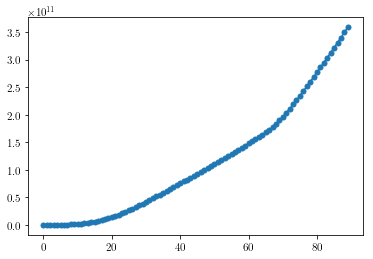

In [82]:
plt.plot([sizes[:(i + 1) * len(files) // num_points].sum() for i in range(num_points)], marker='o', ms=5)

## Variable size of the input data

In [2]:
def get_kmers_and_ram(graph):
    stats = !gtime -v ../../metagraph/build/metagengraph stats {graph}
    num_kmers = int(stats[3].split()[-1])
    peak_ram = int(stats[-14].split()[-1])
    print('{}\t{}\t{}'.format(graph, num_kmers, peak_ram))

In [3]:
data = {}

In [3]:
graphs = !ls ~/big_graph/refseq/refseq_kmc_k17/*.dbg

num_kmers = []
peak_ram = []

for graph in graphs:
    print(graph, end='\t')
    stats = !gtime -v ../../metagraph/build/metagengraph stats {graph}
    num_kmers.append(int(stats[3].split()[-1]))
    peak_ram.append(int(stats[-14].split()[-1]))
    print(num_kmers[-1], end='\t')
    print(peak_ram[-1])

data['Succinct, k=17'] = {}
data['Succinct, k=17']['num_kmers'] = num_kmers
data['Succinct, k=17']['peak_ram'] = peak_ram

/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_10.dbg	2349106012	3029220
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_11.dbg	2996978921	3805456
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_12.dbg	3800490248	4935900
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_13.dbg	4560564244	5915340
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_14.dbg	5325770474	6901908
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_15.dbg	6145221156	7959544
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_16.dbg	6978460811	9029372
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_17.dbg	7785648788	10048768
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_18.dbg	8544283627	11004240
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_19.dbg	9228026681	11864564
/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_1.dbg	5969945	95712
/cluster/home/mikhaika/big_graph/re

In [4]:
text = [
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_10.dbg    2349106012  3029220',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_11.dbg    2996978921  3805456',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_12.dbg    3800490248  4935900',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_13.dbg    4560564244  5915340',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_14.dbg    5325770474  6901908',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_15.dbg    6145221156  7959544',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_16.dbg    6978460811  9029372',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_17.dbg    7785648788  10048768',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_18.dbg    8544283627  11004240',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_19.dbg    9228026681  11864564',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_1.dbg 5969945 95712',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_20.dbg    9954724816  12776508',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_21.dbg    10542179813 13512480',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_22.dbg    11096564306 14205960',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_23.dbg    11749278642 15022744',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_24.dbg    12164794912 15536156',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_25.dbg    12559744892 16000228',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_26.dbg    12916354914 16416412',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_27.dbg    13135282815 16670952',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_28.dbg    13300076909 16862144',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_29.dbg    13533801342 17133164',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_2.dbg 39758790    95712',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_30.dbg    13637122280 17252604',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_3.dbg 129542192   179784',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_4.dbg 278440605   357188',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_5.dbg 448954507   567064',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_6.dbg 630767211   794900',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_7.dbg 898825081   1137308',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_8.dbg 1251777058  1593496',
'/cluster/home/mikhaika/big_graph/refseq/refseq_kmc_k17/subset_9.dbg 1732373512  2217068',
]

num_kmers = []
peak_ram = []

for stats in text:
    _, x, y = stats.split()
    num_kmers.append(int(x))
    peak_ram.append(int(y))

data['Succinct, k=17'] = {}
data['Succinct, k=17']['num_kmers'] = num_kmers
data['Succinct, k=17']['peak_ram'] = peak_ram

In [8]:
# graphs = !ls ~/big_graph/refseq/refseq_kmc_k29/*.dbg

# num_kmers = []
# peak_ram = []

# for graph in graphs:
#     print(graph, end='\t')
#     stats = !gtime -v ../../metagraph/build/metagengraph stats {graph}
#     num_kmers.append(int(stats[3].split()[-1]))
#     peak_ram.append(int(stats[-14].split()[-1]))
#     print(num_kmers[-1], end='\t')
#     print(peak_ram[-1])

# data['Succinct, k=29'] = {}
# data['Succinct, k=29']['num_kmers'] = num_kmers
# data['Succinct, k=29']['peak_ram'] = peak_ram

In [5]:
text = !for file in results/lsf.refseq_k29*dbg.stats; do tail -1 $file; done

num_kmers = []
peak_ram = []

for stats in text:
    _, x, y = stats.split()
    num_kmers.append(int(x))
    peak_ram.append(int(y))

data['Succinct, k=29'] = {}
data['Succinct, k=29']['num_kmers'] = num_kmers
data['Succinct, k=29']['peak_ram'] = peak_ram

In [19]:
# graphs = !ls ~/big_graph/refseq/refseq_kmc_k17/*.orhashdbg

# num_kmers = []
# peak_ram = []

# for graph in graphs:
#     print(graph, end='\t')
#     stats = !gtime -v ../../metagraph/build/metagengraph stats {graph}
#     num_kmers.append(int(stats[3].split()[-1]))
#     peak_ram.append(int(stats[-14].split()[-1]))
#     print(num_kmers[-1], end='\t')
#     print(peak_ram[-1])

# data['Hash, k=17'] = {}
# data['Hash, k=17']['num_kmers'] = num_kmers
# data['Hash, k=17']['peak_ram'] = peak_ram

In [6]:
text = !for file in results/lsf.o*; do tail -1 $file; done

num_kmers = []
peak_ram = []

for stats in text:
    _, x, y = stats.split()
    num_kmers.append(int(x))
    peak_ram.append(int(y))

data['Hash, k=17'] = {}
data['Hash, k=17']['num_kmers'] = num_kmers
data['Hash, k=17']['peak_ram'] = peak_ram

In [ ]:
# graphs = !ls ~/big_graph/refseq/refseq_kmc_k29/*.orhashdbg

# num_kmers = []
# peak_ram = []

# for graph in graphs:
#     print(graph, end='\t')
#     stats = !gtime -v ../../metagraph/build/metagengraph stats {graph}
#     num_kmers.append(int(stats[3].split()[-1]))
#     peak_ram.append(int(stats[-14].split()[-1]))
#     print(num_kmers[-1], end='\t')
#     print(peak_ram[-1])

# data['Hash, k=29'] = {}
# data['Hash, k=29']['num_kmers'] = num_kmers
# data['Hash, k=29']['peak_ram'] = peak_ram

In [44]:
#sizes = np.array([os.path.getsize(x) for x in files])

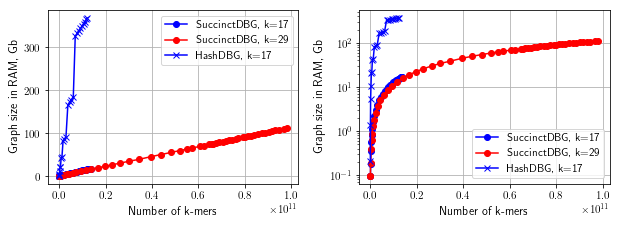

In [15]:
width = 3.487 * 1.5
height = width / 1.618

fig, axes = plt.subplots(1, 2, figsize=(width / 1.2 * 2, height))
#ax.set_title('RefSeq graph, with replaced \'N\'s')
#ax.set_title('RefSeq assembly graph')

ax = axes[0]
for ax in axes:
    idx = np.argsort(data['Succinct, k=17']['num_kmers'])
    ax.plot(np.array(data['Succinct, k=17']['num_kmers'])[idx],
            np.array(data['Succinct, k=17']['peak_ram'])[idx] / 10**6,
            'b', marker='o', label='SuccinctDBG, k=17')

    idx = np.argsort(data['Succinct, k=29']['num_kmers'])
    ax.plot(np.array(data['Succinct, k=29']['num_kmers'])[idx],
            np.array(data['Succinct, k=29']['peak_ram'])[idx] / 10**6,
            'r', marker='o', label='SuccinctDBG, k=29')

    idx = np.argsort(data['Hash, k=17']['num_kmers'])
    ax.plot(np.array(data['Hash, k=17']['num_kmers'])[idx],
            np.array(data['Hash, k=17']['peak_ram'])[idx] / 10**6,
            'b', marker='x', label='HashDBG, k=17')

    # idx = np.argsort(data['Hash, k=29']['num_kmers'])
    # ax.plot(np.array(data['Hash, k=29']['num_kmers'])[idx],
    #         np.array(data['Hash, k=29']['peak_ram'])[idx] / 10**6,
    #         'r', marker='x', label='Hash, k=29')

    ax.set_xlabel('Number of k-mers')
    ax.set_ylabel('Graph size in RAM, Gb')
    #ax.set_xticks(np.array(k_array))
    ax.grid(True)
    ax.legend(loc='best')

axes[1].set_yscale('log')

plt.tight_layout()
plt.savefig('graph_input_scalability.pdf', format='pdf', bbox_inches='tight')
plt.show()

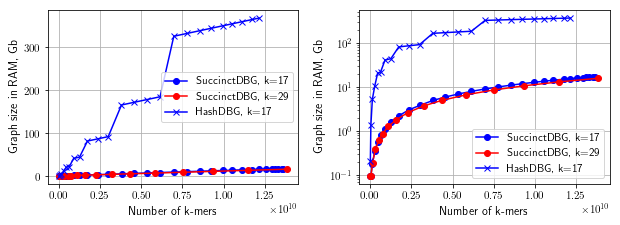

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(width / 1.2 * 2, height))
#ax.set_title('RefSeq graph, with replaced \'N\'s')
#ax.set_title('RefSeq assembly graph')

x_max = 15e9

ax = axes[0]
for ax in axes:
    idx = np.argsort(data['Succinct, k=17']['num_kmers'])
    idx = idx[np.array(data['Succinct, k=17']['num_kmers'])[idx] < x_max]
    ax.plot(np.array(data['Succinct, k=17']['num_kmers'])[idx],
            np.array(data['Succinct, k=17']['peak_ram'])[idx] / 10**6,
            'b', marker='o', label='SuccinctDBG, k=17')

    idx = np.argsort(data['Succinct, k=29']['num_kmers'])
    idx = idx[np.array(data['Succinct, k=29']['num_kmers'])[idx] < x_max]
    ax.plot(np.array(data['Succinct, k=29']['num_kmers'])[idx],
            np.array(data['Succinct, k=29']['peak_ram'])[idx] / 10**6,
            'r', marker='o', label='SuccinctDBG, k=29')

    idx = np.argsort(data['Hash, k=17']['num_kmers'])
    idx = idx[np.array(data['Hash, k=17']['num_kmers'])[idx] < x_max]
    ax.plot(np.array(data['Hash, k=17']['num_kmers'])[idx],
            np.array(data['Hash, k=17']['peak_ram'])[idx] / 10**6,
            'b', marker='x', label='HashDBG, k=17')

    # idx = np.argsort(data['Hash, k=29']['num_kmers'])
    # ax.plot(np.array(data['Hash, k=29']['num_kmers'])[idx],
    #         np.array(data['Hash, k=29']['peak_ram'])[idx] / 10**6,
    #         'r', marker='x', label='Hash, k=29')

    ax.set_xlabel('Number of k-mers')
    ax.set_ylabel('Graph size in RAM, Gb')
    #ax.set_xticks(np.array(k_array))
    ax.grid(True)
    ax.legend(loc='best')

axes[1].set_yscale('log')

plt.tight_layout()
plt.savefig('graph_input_scalability_restricted.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Variable $k$

### Ref-Seq assembly data

In [2]:
k_array = np.arange(10, 24)

In [3]:
!ls ~/big_graph/refseq/refseq_k10/graph_refseq_k10.dbg

/cluster/home/mikhaika/big_graph/refseq/refseq_k10/graph_refseq_k10.dbg


In [4]:
sizes = [os.path.getsize('../big_graph/refseq/refseq_k{}/graph_refseq_k{}.dbg'.format(x, x))
             for x in k_array]
sizes

[5017397,
 19957085,
 79716413,
 318783677,
 1275200189,
 5100406198,
 20193422370,
 70555357553,
 180029209052,
 320880966947,
 424795775328,
 470859116657,
 490467611111,
 503062440506]

In [5]:
num_edges = [4194305,
16777217,
67108865,
268435457,
1073741825,
4294807964,
17004180213,
58827897766,
147478598494,
261992234631,
355110450523,
411025684461,
441788978532,
459869414309,
]

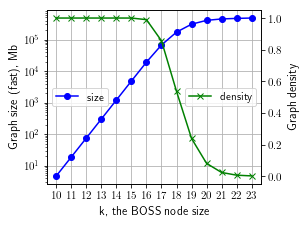

In [6]:
width = 3.487 * 1.5
height = width / 1.618

fig, ax = plt.subplots(1, 1, figsize=(width / 1.2, height))
#ax.set_title('RefSeq graph, with replaced \'N\'s')
#ax.set_title('RefSeq assembly graph')

ax.plot(np.array(k_array), np.array(sizes) / 2**20, marker='o', label='size', c='b')
ax.set_yscale('log')
ax.set_ylabel('Graph size (fast), Mb')
ax.set_xlabel('k, the BOSS node size')
ax.set_xticks(np.array(k_array))
ax.grid(True)
ax.legend(loc='center left')

ax2 = ax.twinx()
ax2.plot(np.array(k_array), num_edges / 4 ** (np.array(k_array) + 1), marker='x', label='density', c='g')
#ax2.set_yscale('log')
ax2.set_ylabel('Graph density')
ax2.legend(loc='center right')

plt.tight_layout()
plt.savefig('refseq_scalability.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Kingsford data

In [7]:
k_array = np.concatenate((np.arange(5, 21), np.arange(22, 34, 2)))

In [8]:
!ls ~/big_graph/kingsford/var_k/graph_kingsford_k*.dbg

ls: cannot access '/cluster/home/mikhaika/big_graph/kingsford/var_k/graph_kingsford_k*.dbg': No such file or directory


In [9]:
sizes = [os.path.getsize('../big_graph/kingsford/var_k/graph_kingsford_k{}.dbg'.format(x, x)) for x in k_array]
sizes

FileNotFoundError: [Errno 2] No such file or directory: '../big_graph/kingsford/var_k/graph_kingsford_k5.dbg'

In [ ]:
num_edges = [15626,
78126,
390617,
1902278,
7468325,
24194804,
72215346,
197636600,
512173368,
1326508825,
2934716087,
4955736317,
6790193411,
8184346383,
9226858039,
10082499128,
10868326297,
11479986324,
12901835746,
14190173930,
15700483703,
17261067050,
]

In [ ]:
width = 3.487 * 1.5
height = width / 1.618

fig, ax = plt.subplots(1, 1, figsize=(width / 1.2, height))
#ax.set_title('Kingsford graph, with replaced \'N\'s')
#ax.set_title('Kingsford assembly graph')

ax.plot(np.array(k_array), np.array(sizes) / 2**20, marker='o', label='size', c='b')
ax.set_yscale('log')
ax.set_ylabel('Graph size (fast), Mb')
ax.set_xlabel('k, the BOSS node size')
#ax.set_xticks(np.array(k_array))
ax.set_xticks([6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])
ax.grid(True)
ax.legend(loc=(0.7, 0.75))

ax2 = ax.twinx()
ax2.plot(np.array(k_array), num_edges / 5 ** (np.array(k_array) + 1), marker='x', label='density', c='g')
#ax2.set_yscale('log')
ax2.set_ylabel('Graph density')
ax2.legend(loc=(0.6, 0.1))

plt.tight_layout()
plt.savefig('kingsford_scalability.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Plots

In [ ]:
k_array_refseq = np.arange(10, 24)
sizes_refseq = [os.path.getsize('../big_graph/refseq/refseq_k{}/graph_refseq_k{}.dbg'.format(x, x)) for x in k_array_refseq]
num_edges_refseq = [4194305,
16777217,
67108865,
268435457,
1073741825,
4294807964,
17004180213,
58827897766,
147478598494,
261992234631,
355110450523,
411025684461,
441788978532,
459869414309,
]

In [ ]:
width = 3.487 * 1.5
height = width / 1.618

fig, ax = plt.subplots(1, 1, figsize=(width / 1.2, height))
#ax.set_title('RefSeq graph, with replaced \'N\'s')
#ax.set_title('RefSeq assembly graph')

ax1_plot1 = ax.plot(np.array(k_array_refseq), np.array(sizes_refseq) / 2**20, marker='o', label='RS: size', c='b')
ax1_plot2 = ax.plot(np.array(k_array), np.array(sizes) / 2**20, marker='o', label='KF: size', c='r')
ax.set_yscale('log')
ax.set_ylabel('Graph size (fast), Mb')
ax.set_xlabel('$k$, the BOSS node size')
#ax.set_xticks(np.array(k_array))
ax.set_xticks([6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])
ax.grid(True)

ax2 = ax.twinx()
ax2_plot1 = ax2.plot(np.array(k_array_refseq), num_edges_refseq / 4 ** (np.array(k_array_refseq) + 1), marker='x', label='RS: density', c='b')
ax2_plot2 = ax2.plot(np.array(k_array), num_edges / 5 ** (np.array(k_array) + 1), marker='x', label='KF: density', c='r')
#ax2.set_yscale('log')
ax2.set_ylabel('Graph density')

lns = ax1_plot1 + ax1_plot2 + ax2_plot1 + ax2_plot2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right')

plt.tight_layout()
plt.savefig('graph_k_scalability.pdf', format='pdf', bbox_inches='tight')
plt.show()